<a href="https://colab.research.google.com/github/sanjit1995/BigMartSales_AV/blob/master/BigMartSales_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries and data files

In [1]:
import pandas as pd
import numpy as np

In [521]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BigMartSales_AV/train.csv")
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BigMartSales_AV/test.csv")

In [ ]:
train

In [275]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Concat train and test data files to operate on them together to make sure all the category values are preserved

In [522]:
combined_df = pd.concat([train,test])
combined_df = combined_df.reset_index()
combined_df = combined_df.drop(['index'], axis=1)

In [444]:
combined_df.shape

(14204, 12)

In [445]:
items = combined_df.Item_Identifier.unique()

In [446]:
len(items)

1559

In [ ]:
combined_df[combined_df['Item_Identifier']=='DRB01']['Item_Visibility']

In [456]:
combined_df[combined_df['Item_Identifier']=='FDX07']['Item_Weight']

3        19.2
1491     19.2
2459     19.2
3089     19.2
5906     19.2
7735     19.2
9054     19.2
12074    19.2
12561    19.2
Name: Item_Weight, dtype: float64

In [195]:
combined_df.Item_Weight = combined_df.Item_Weight.fillna(combined_df[combined_df['Item_Identifier']=='FDP10']['Item_Weight'].mode()[0])

In [465]:
combined_df[combined_df['Item_Identifier']==combined_df['Item_Identifier'].iloc[0]]['Item_Visibility'].median()

0.016047301

In [457]:
len(combined_df)

14204

Adjust missing values according to values that are already present

In [523]:
for ind in range(0,len(combined_df)):
  if pd.isnull(combined_df['Item_Weight'].iloc[ind]):
    combined_df['Item_Weight'].iloc[ind] = combined_df[combined_df['Item_Identifier']==combined_df['Item_Identifier'].iloc[ind]]['Item_Weight'].mode()[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [524]:
for ind in range(0,len(combined_df)):
  if combined_df['Item_Visibility'].iloc[ind] == 0:
    combined_df['Item_Visibility'].iloc[ind] = combined_df[combined_df['Item_Identifier']==combined_df['Item_Identifier'].iloc[ind]]['Item_Visibility'].median()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
combined_df

In [471]:
combined_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [525]:
train = combined_df.loc[:8522,:]
test = combined_df.loc[8523:,:]
test = test.drop(['Item_Outlet_Sales'], axis=1)

Create a new feature as it has more correlation as compared to the parent feature

In [526]:
train['Price_per_unit_weight'] = train['Item_MRP']/train['Item_Weight']
test['Price_per_unit_weight'] = test['Item_MRP']/test['Item_Weight']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.isnull().sum()

Make sure all the category values are same throughout

In [527]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [372]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [373]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

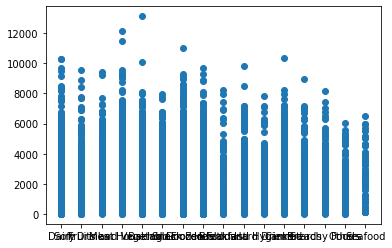

In [374]:
import matplotlib.pyplot as plt
plt.scatter(train['Item_Type'], train['Item_Outlet_Sales'])

In [507]:
from scipy import stats
z = np.abs(stats.zscore(x_train))
outlier_ind, outlier_label = np.where(z > 3)

In [512]:
from scipy import stats
x_train[(np.abs(stats.zscore(x_train)) < 3).all(axis=1)]

Text(0, 0.5, 'cumulative explained variance')

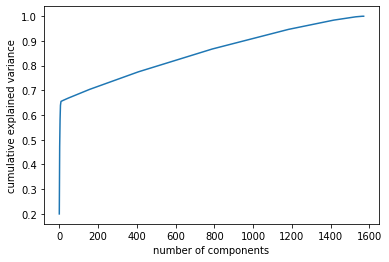

In [549]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
np.unique(outlier_label, return_counts=True)

In [509]:
del_ind = list(set(outlier_ind))
del_ind.sort()

In [510]:
len(del_ind)

4433

In [330]:
train = train.drop(del_ind)

In [331]:
train.shape

(8295, 13)

In [76]:
z

array([1.74745381, 1.48902325, 0.01004021, ..., 0.89720755, 0.60797692,
       1.05226104])

In [ ]:
train.head(5)

Check correlation between numerical features and target

In [375]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Price_per_unit_weight
Item_Weight,1.000000,-0.009661,0.026172,-0.012823,0.013261,-0.610741
Item_Visibility,-0.009661,1.000000,-0.001315,-0.074834,-0.128625,0.002431
Item_MRP,0.026172,-0.001315,1.000000,0.005020,0.567574,0.683229
Outlet_Establishment_Year,-0.012823,-0.074834,0.005020,1.000000,-0.049135,0.010656
Item_Outlet_Sales,0.013261,-0.128625,0.567574,-0.049135,1.000000,0.383348
Price_per_unit_weight,-0.610741,0.002431,0.683229,0.010656,0.383348,1.000000


Remove irrelevant features or the ones with less correlation

In [531]:
train = train.drop(['Item_Weight'], axis=1)
test = test.drop(['Item_Weight'], axis=1)

In [532]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Price_per_unit_weight      8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [533]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 8523 to 14203
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                4075 non-null   object 
 8   Outlet_Location_Type       5681 non-null   object 
 9   Outlet_Type                5681 non-null   object 
 10  Price_per_unit_weight      5681 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Separate test data, training data and labels according to selected features

In [534]:
x_train = train[['Item_Identifier','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Price_per_unit_weight']]
y_train = train['Item_Outlet_Sales']
x_test = test[['Item_Identifier','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Price_per_unit_weight']]
print(x_train.shape, y_train.shape, x_test.shape)

(8523, 8) (8523,) (5681, 8)


In [600]:
x_train

,Item_Visibility,Item_MRP,Price_per_unit_weight,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,...,Item_Identifier_NCX05,Item_Identifier_NCX06,Item_Identifier_NCX17,Item_Identifier_NCX18,Item_Identifier_NCX29,Item_Identifier_NCX30,Item_Identifier_NCX41,Item_Identifier_NCX42,Item_Identifier_NCX53,Item_Identifier_NCX54,Item_Identifier_NCY05,Item_Identifier_NCY06,Item_Identifier_NCY17,Item_Identifier_NCY18,Item_Identifier_NCY29,Item_Identifier_NCY30,Item_Identifier_NCY41,Item_Identifier_NCY42,Item_Identifier_NCY53,Item_Identifier_NCY54,Item_Identifier_NCZ05,Item_Identifier_NCZ06,Item_Identifier_NCZ17,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Years_Since_Establishment
0,0.048866,0.927507,0.513047,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0.416667
1,0.058705,0.072068,0.132117,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0.000000
2,0.051037,0.468288,0.130873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0.416667
3,0.069778,0.640093,0.159210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0.458333
4,0.040126,0.095805,0.088907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.172914,0.777729,0.602384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0.916667
8519,0.143069,0.326263,0.228899,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0.291667
8520,0.107148,0.228492,0.129609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0.208333
8521,0.442219,0.304939,0.257357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0.000000


In [605]:
pd.DataFrame(y_train).shape

(8523, 1)

For better encoding and to ensure all categorical values are included in both the train and test datasets

In [536]:
total_df = pd.concat([x_train, x_test])

In [537]:
total_df = total_df.reset_index()
total_df = total_df.drop(['index'], axis=1)

In [ ]:
total_df

In [538]:
total_df.shape

(14204, 8)

In [539]:
total_df = pd.get_dummies(data=total_df, columns=['Item_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Type'])

In [487]:
total_df = pd.get_dummies(data=total_df, columns=['Item_Type','Item_Fat_Content','Outlet_Location_Type','Outlet_Type'])

In [540]:
total_df['Years_Since_Establishment'] = 2013 - total_df['Outlet_Establishment_Year']

In [ ]:
total_df.isnull().sum()

Apply Scaling to numerical features

In [541]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
total_df[['Item_Visibility','Item_MRP','Years_Since_Establishment','Price_per_unit_weight']] = scaler.fit_transform(total_df[['Item_Visibility','Item_MRP','Years_Since_Establishment','Price_per_unit_weight']])

In [544]:
total_df = total_df.drop(['Outlet_Establishment_Year'], axis=1)

Separate train and test data as per indexes

In [545]:
x_train = total_df.loc[:8522,:]
x_test = total_df.loc[8523:,:]

In [ ]:
x_train

In [547]:
x_test = x_test.reset_index()
x_test = x_test.drop(['index'], axis=1)

In [ ]:
x_test

Removal of irrelevant features

In [496]:
x_train = x_train.drop(['Years_Since_Establishment'], axis=1)
x_test = x_test.drop(['Years_Since_Establishment'], axis=1)

In [550]:
x_train.shape

(8523, 1572)

In [551]:
x_test.shape

(5681, 1572)

In [552]:
y_train.shape

(8523,)

Using various Regression Models

In [561]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [583]:
import xgboost
model = xgboost.XGBRegressor(n_estimators=50)
model.fit(x_train, y_train)

[10:29:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [595]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [596]:
y_pred = model.predict(x_test)
y_pred

array([1720.01254711, 1791.37191322, 1608.15128547, ..., 1808.95672528,
       1880.30110971, 1780.94058688])

In [597]:
y_pred.shape

(5681,)

Saving into a file of an expected format

In [599]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BigMartSales_AV/test.csv")
datasets = pd.concat([sub_df[['Item_Identifier','Outlet_Identifier']],pred], axis=1)
datasets.columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
datasets.to_csv('/content/my_submission21.csv', index=False)